Importing the necessary libraries. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import csv

In [2]:
# Magic function for plotting the graphs within the notebook. 
%matplotlib inline

In [3]:
# For the better palette and themes. 
sns.set()

In [4]:
# For display. 
plt.style.use('ggplot')

The source file downloaded is present under the .\source folder with the name, dataset.csv. 

This file has in total of 13 columns but some of the rows have commas as part of the field values which made some rows to have more or less columns than needed. For example, the 4th row is as follows:

    U Launcher Lite â€“ FREE Live Cool Themes, Hide Apps,ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up				
    
Which indicates that some of the fields were not surrounded with double quotes to include commas as part of the field value. Hence the following code is being used to preprocess the dataset to be suitable for loading into Pandas. 

The correction made is to merge all the column data before the category column, here in the above case ART_AND_DESIGN into a single column and replace the ',' in the first column to space. 

    U Launcher Lite â€“ FREE Live Cool Themes Hide Apps,ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
    
This would align the columns properly with the column headers. 

In [5]:
# input source file. 
input_file = open(r'.\source\dataset.csv', 'r', encoding = 'utf-8')
# processed file with corrections made to the columns. 
output_file = open(r'.\processed\dataset_clean.csv', 'w', encoding = 'utf-8', newline = '')

# Creating a csv reader from the input source file. 
csv_reader = csv.reader(input_file, delimiter = ',')

# Creating a csv writer for the processed file. 
csv_writer = csv.writer(output_file, delimiter = ',')

# The unique values of the column, CATEGORY which we will use for merging process. 
categories = ['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION']

# This variable is for the header to be excluded from the above process. 
row_counter = 0

for row in csv_reader:

    # The below code will exclude the first row which is the header and it will write the header to the processed file as it is. 
    if not row_counter:
        csv_writer.writerow(row)
        row_counter = 1
        continue

    # target variable for the processed file. 
    new_row = []

    flag = False

    # The idea is as follows:
    # Take all the column values and create them as a single value to be placed in the first column until we reach the CATEGORY.
    # The moment we reach category, we will include all the column values as it is into the dataset without any change. 
    for value in row:
        if (value not in categories) and (not flag):
            if new_row == []:
                new_row.append(value)
            else:
                new_row[0] += value
        else:
            new_row.append(value)
            flag = True
    
    new_row[-1] = new_row[-1].strip()

    csv_writer.writerow(new_row)

# cleanup for open files. 
input_file.close()
output_file.close()

Now we are going to read the dataset_clean.csv file into our Pandas DataFrame. 

There is one line which has the `Category` column as null value, and this has been manually set to a space in the target file. The row number for this line is, 10472. 

In [6]:
# The seperator is default ',', and the encoding chosen is utf8 for special characters present in the file. 
df = pd.read_csv(r'.\processed\dataset_clean.csv', encoding = 'utf8')

Checking to see if the data has been loaded correctly or not. 

In [7]:
df.head()

App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite â€“ FREE Live Cool Themes Hide...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

   Reviews  Size     Installs  Type Price Content Rating  \
0      159   19M      10,000+  Free     0       Everyone   
1      967   14M     500,000+  Free     0       Everyone   
2    87510  8.7M   5,000,000+  Free     0       Everyone   
3   215644   25M  50,000,000+  Free     0           Teen   
4      967  2.8M     100,000+  Free     0       Everyone   

                      Genres      Last Updated         Current Ver  \
0               Art & Design   January 7, 2018               1.0.0   
1  Art & Design;Pretend Play  January 15, 2018               2.0.0   
2               Art & Design    August 1, 2018               1.2.4   
3               Art & Design      June 8, 2018  Varies with device   
4    Art & Design;Creativity     June 20, 2018                 1.1   

  Android Ver\t\t\t\t  
0        4.0.3 and up  
1        4.0.3 and up  
2        4.0.3 and up  
3          4.2 and up  
4          4.4 and up

In [8]:
df.tail()

App             Category  \
10836                               Sya9a Maroc - FR               FAMILY   
10837               Fr. Mike Schmitz Audio Teachings               FAMILY   
10838                         Parkinson Exercices FR              MEDICAL   
10839                  The SCP Foundation DB fr nn5n  BOOKS_AND_REFERENCE   
10840  iHoroscope - 2018 Daily Horoscope & Astrology            LIFESTYLE   

       Rating  Reviews                Size     Installs  Type Price  \
10836     4.5       38                 53M       5,000+  Free     0   
10837     5.0        4                3.6M         100+  Free     0   
10838     NaN        3                9.5M       1,000+  Free     0   
10839     4.5      114  Varies with device       1,000+  Free     0   
10840     4.5   398307                 19M  10,000,000+  Free     0   

      Content Rating             Genres      Last Updated         Current Ver  \
10836       Everyone          Education     July 25, 2017                1.48   
10837       Everyone          Education      July 6, 2018                 1.0   
10838       Everyone            Medical  January 20, 2017                 1.0   
10839     Mature 17+  Books & Reference  January 19, 2015  Varies with device   
10840       Everyone          Lifestyle     July 25, 2018  Varies with device   

      Android Ver\t\t\t\t  
10836          4.1 and up  
10837          4.1 and up  
10838          2.2 and up  
10839  Varies with device  
10840  Varies with device

Checking the columns. 

In [9]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver\t\t\t\t'],
      dtype='object')

We have extra tab characters as part of the columns, which can be removed using the following code. 

In [10]:
df.columns = df.columns.str.strip()

In [11]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [12]:
df.shape

(10841, 13)

We have in total of 10841 rows and 13 columns in the dataset. 

Checking on the `info()` method to see the metadata. 

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
App               10841 non-null object
Category          10841 non-null object
Rating            9367 non-null float64
Reviews           10841 non-null int64
Size              10841 non-null object
Installs          10841 non-null object
Type              10840 non-null object
Price             10841 non-null object
Content Rating    10841 non-null object
Genres            10840 non-null object
Last Updated      10841 non-null object
Current Ver       10833 non-null object
Android Ver       10839 non-null object
dtypes: float64(1), int64(1), object(11)
memory usage: 1.1+ MB


#### Memory Usage

Let's try and see if we can reduce the memory usage of this particular dataset. 

In [14]:
df.memory_usage(deep = True)

Index                128
App               891561
Category          715771
Rating             86728
Reviews            86728
Size              679788
Installs          703787
Type              661272
Price             672254
Content Rating    702506
Genres            730887
Last Updated      768373
Current Ver       692565
Android Ver       740770
dtype: int64

There are some categorical columns which we can check to see if we can convert them info 'pd.Categorical' type. 

In [15]:
df['Category'].nunique()

33

The number of values in `Category` is quite less than the total number of rows, hence we can convert this into categorical column. 

In [16]:
df['Category'] = df['Category'].astype('category')

In [17]:
df.memory_usage(deep = True)

Index                128
App               891561
Category           14361
Rating             86728
Reviews            86728
Size              679788
Installs          703787
Type              661272
Price             672254
Content Rating    702506
Genres            730887
Last Updated      768373
Current Ver       692565
Android Ver       740770
dtype: int64

Similarly the column, `Type` can be converted into a categorical column. 

In [18]:
df['Type'] = df['Type'].astype('category')

In [19]:
df.memory_usage(deep = True)

Index                128
App               891561
Category           14361
Rating             86728
Reviews            86728
Size              679788
Installs          703787
Type               11043
Price             672254
Content Rating    702506
Genres            730887
Last Updated      768373
Current Ver       692565
Android Ver       740770
dtype: int64

Let's check for the column `Content Rating`. 

In [20]:
df['Content Rating'].nunique()

6

Since we have only 6 values, it is a good candidate to convert this into categorical value. 

In [21]:
df['Content Rating'] = df['Content Rating'].astype('category')

In [22]:
df.memory_usage(deep = True)

Index                128
App               891561
Category           14361
Rating             86728
Reviews            86728
Size              679788
Installs          703787
Type               11043
Price             672254
Content Rating     11399
Genres            730887
Last Updated      768373
Current Ver       692565
Android Ver       740770
dtype: int64

Let's see for the column, `Genres`. 

In [23]:
df['Genres'].nunique()

119

We have 119 values, and this can be converted into a category column. 

In [24]:
df['Genres'] = df['Genres'].astype('category')

In [25]:
df.memory_usage(deep = True)

Index                128
App               891561
Category           14361
Rating             86728
Reviews            86728
Size              679788
Installs          703787
Type               11043
Price             672254
Content Rating     11399
Genres             24857
Last Updated      768373
Current Ver       692565
Android Ver       740770
dtype: int64

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
App               10841 non-null object
Category          10841 non-null category
Rating            9367 non-null float64
Reviews           10841 non-null int64
Size              10841 non-null object
Installs          10841 non-null object
Type              10840 non-null category
Price             10841 non-null object
Content Rating    10841 non-null category
Genres            10840 non-null category
Last Updated      10841 non-null object
Current Ver       10833 non-null object
Android Ver       10839 non-null object
dtypes: category(4), float64(1), int64(1), object(7)
memory usage: 812.5+ KB


The memory usage of the file has been reduced to 800+ KB from 1.1 MB. 

Let's check the `reviews` column to see if we can get any memory improvement from there. 

In [27]:
df['Reviews'].min(), df['Reviews'].max()

(0, 78158306)

This can be converted into a float16 datatype. 

In [28]:
df['Reviews'] = df['Reviews'].astype('float16')

The `Ratings` column can also be converted into `float16` datatype. 

In [29]:
df['Rating'] = df['Rating'].astype('float16')

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
App               10841 non-null object
Category          10841 non-null category
Rating            9367 non-null float16
Reviews           10841 non-null float16
Size              10841 non-null object
Installs          10841 non-null object
Type              10840 non-null category
Price             10841 non-null object
Content Rating    10841 non-null category
Genres            10840 non-null category
Last Updated      10841 non-null object
Current Ver       10833 non-null object
Android Ver       10839 non-null object
dtypes: category(4), float16(2), object(7)
memory usage: 685.4+ KB


The memory of the dataset has been reduced to 685 KB. 

The `price` column has been assigned a object type by default. This would have to be changed to a float. Before we make the changes, the price column has the `$` sign in it, which would need to be removed for performing the analysis. 

In [31]:
df['Price'] = df['Price'].str.replace('$', '')
df['Price'] = df['Price'].astype('float32')

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
App               10841 non-null object
Category          10841 non-null category
Rating            9367 non-null float16
Reviews           10841 non-null float16
Size              10841 non-null object
Installs          10841 non-null object
Type              10840 non-null category
Price             10841 non-null float32
Content Rating    10841 non-null category
Genres            10840 non-null category
Last Updated      10841 non-null object
Current Ver       10833 non-null object
Android Ver       10839 non-null object
dtypes: category(4), float16(2), float32(1), object(6)
memory usage: 643.1+ KB


#### Missing Value Treatment

We can try and see the missing values from the dataset. 

In [33]:
df.isna().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               1
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

Other than rating rest all of the columns where data is missing less than 5% of the data and hence we can consider them for deletion. Though not deleting them as we have a set of questions to answer from IMT. 

#### Univariate Analysis - Categorical Columns

`Category` column is a categorical column, so let's check the frequency distribution of the same. 

In [34]:
category_column = df['Category'].value_counts()

In [35]:
category_column

FAMILY                 1972
GAME                   1144
TOOLS                   843
MEDICAL                 463
BUSINESS                460
PRODUCTIVITY            424
PERSONALIZATION         392
COMMUNICATION           387
SPORTS                  384
LIFESTYLE               383
FINANCE                 366
HEALTH_AND_FITNESS      341
PHOTOGRAPHY             335
SOCIAL                  295
NEWS_AND_MAGAZINES      283
SHOPPING                260
TRAVEL_AND_LOCAL        258
DATING                  234
BOOKS_AND_REFERENCE     231
VIDEO_PLAYERS           175
EDUCATION               156
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     137
FOOD_AND_DRINK          127
HOUSE_AND_HOME           88
LIBRARIES_AND_DEMO       85
AUTO_AND_VEHICLES        85
WEATHER                  82
ART_AND_DESIGN           65
EVENTS                   64
COMICS                   60
PARENTING                60
BEAUTY                   53
Name: Category, dtype: int64

From the data, we can say that the maximum number of categories of apps that were downloaded are from 'Family' and then followed by the 'Game'. Let's convert them into percentages for better understanding. 

In [36]:
df['Category'].value_counts(normalize = True)

FAMILY                 0.181902
GAME                   0.105525
TOOLS                  0.077760
MEDICAL                0.042708
BUSINESS               0.042432
PRODUCTIVITY           0.039111
PERSONALIZATION        0.036159
COMMUNICATION          0.035698
SPORTS                 0.035421
LIFESTYLE              0.035329
FINANCE                0.033761
HEALTH_AND_FITNESS     0.031455
PHOTOGRAPHY            0.030901
SOCIAL                 0.027212
NEWS_AND_MAGAZINES     0.026105
SHOPPING               0.023983
TRAVEL_AND_LOCAL       0.023799
DATING                 0.021585
BOOKS_AND_REFERENCE    0.021308
VIDEO_PLAYERS          0.016142
EDUCATION              0.014390
ENTERTAINMENT          0.013744
MAPS_AND_NAVIGATION    0.012637
FOOD_AND_DRINK         0.011715
HOUSE_AND_HOME         0.008117
LIBRARIES_AND_DEMO     0.007841
AUTO_AND_VEHICLES      0.007841
WEATHER                0.007564
ART_AND_DESIGN         0.005996
EVENTS                 0.005904
COMICS                 0.005535
PARENTIN

Let's try and visualize the data. 

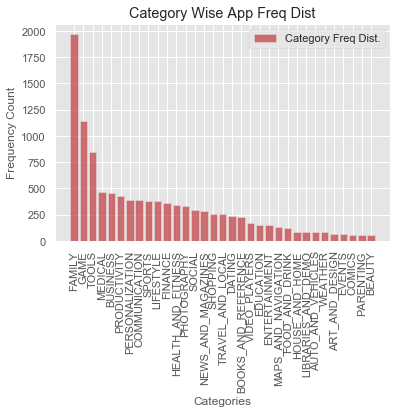

In [37]:
plt.bar(category_column.index, category_column.values, label = 'Category Freq Dist.', alpha = 0.8, color = 'r')
plt.xlabel('Categories')
plt.ylabel('Frequency Count')

axes = plt.gca()
for label in axes.xaxis.get_ticklabels():    
    label.set_rotation(90)
    
plt.title('Category Wise App Freq Dist')
plt.legend()
plt.show()

The `Type` column is also categorical. Let's see the frequency distribution of the same. 

In [38]:
df['Type'].value_counts()

Free    10040
Paid      800
Name: Type, dtype: int64

Let's get the percentages of the same. 

In [39]:
df['Type'].value_counts(normalize = True)

Free    0.926199
Paid    0.073801
Name: Type, dtype: float64

So over 92% of the apps that were downloaded are Free and only little over 7% of the apps are Paid. 

In [40]:
type_column = df['Type'].value_counts()

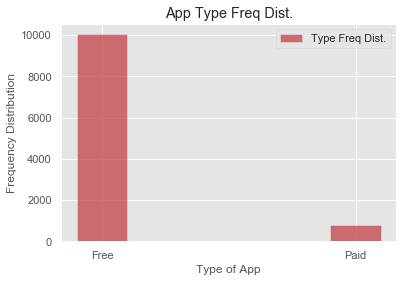

In [41]:
plt.bar(type_column.index, type_column.values, color = 'r', alpha = 0.8, label = 'Type Freq Dist.', width = 0.2)
plt.xlabel('Type of App')
plt.ylabel('Frequency Distribution')
plt.title('App Type Freq Dist.')
plt.legend()
plt.show()

The `Genres` column is also a categorical column. So let's take the frequency distribution of the same. 

In [42]:
df['Genres'].value_counts()

Tools                                842
Entertainment                        623
Education                            549
Medical                              463
Business                             460
                                    ... 
Comics;Creativity                      1
Strategy;Education                     1
Communication;Creativity               1
Strategy;Creativity                    1
Travel & Local;Action & Adventure      1
Name: Genres, Length: 119, dtype: int64

In [43]:
df['Genres'].isna().sum()

1

In [44]:
df[df['Genres'].isna()]

App   Category    Rating  Reviews  \
10472  Life Made WI-Fi Touchscreen Photo Frame  LIFESTYLE  1.900391     19.0   

       Size Installs  Type  Price Content Rating Genres       Last Updated  \
10472  3.0M   1,000+  Free    0.0       Everyone    NaN  February 11, 2018   

      Current Ver Android Ver  
10472      1.0.19  4.0 and up

We have a missing `Genre` for the row, 10472. By looking up the app on the Google Playstore it says this app belongs to the Genre 'Lifestyle'. So we can update the Genre accordingly. 

In [45]:
df.at[10472, 'Genres'] = 'Lifestyle'

In [46]:
df['Genres'].isna().sum()

0

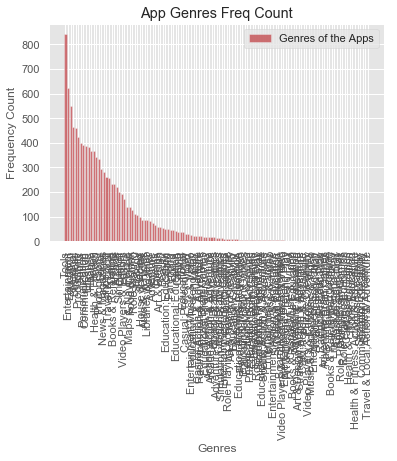

In [47]:
genre_column = df['Genres'].value_counts()
plt.bar(genre_column.index, genre_column.values, color = 'r', alpha = 0.8, label = 'Genres of the Apps')
plt.xlabel('Genres')
plt.ylabel('Frequency Count')
plt.title('App Genres Freq Count')
axes = plt.gca()
for label in axes.xaxis.get_ticklabels():
    label.set_rotation(90)
plt.legend()
plt.show()

Since there are lot of `Genres`, we could probably see what are the top 10. 

In [48]:
genre_column.nlargest(10)

Tools              842
Entertainment      623
Education          549
Medical            463
Business           460
Productivity       424
Sports             398
Personalization    392
Communication      387
Lifestyle          382
Name: Genres, dtype: int64

We could also see what are the bottom 10. 

In [49]:
genre_column.nsmallest(10)

Music & Audio;Music & Video     1
Entertainment;Education         1
Arcade;Pretend Play             1
Puzzle;Education                1
Racing;Pretend Play             1
Adventure;Brain Games           1
Parenting;Brain Games           1
Trivia;Education                1
Books & Reference;Creativity    1
Lifestyle;Pretend Play          1
Name: Genres, dtype: int64

Most of these Genres seem to be misclassified or belong to multiple Genres. 

The column `Content Rating` is also a categorical column. 

In [50]:
df['Content Rating'].value_counts()

Everyone           8715
Teen               1208
Mature 17+          499
Everyone 10+        414
Adults only 18+       3
Unrated               2
Name: Content Rating, dtype: int64

Let's take the percentages for better comparison. 

In [51]:
df['Content Rating'].value_counts(normalize = True)

Everyone           0.803893
Teen               0.111429
Mature 17+         0.046029
Everyone 10+       0.038188
Adults only 18+    0.000277
Unrated            0.000184
Name: Content Rating, dtype: float64

As we can see nearly 80% of the apps belong to Everyone. 

In [52]:
content_rating_column = df['Content Rating'].value_counts()

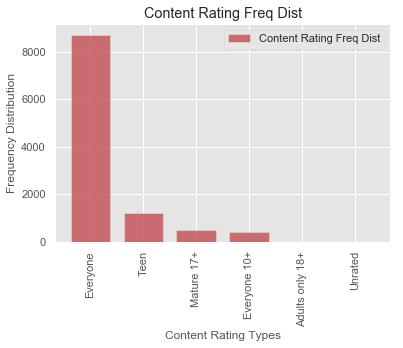

In [53]:
plt.bar(content_rating_column.index, content_rating_column.values, alpha = 0.8, color = 'r', label = 'Content Rating Freq Dist', width = 0.75)
plt.xlabel('Content Rating Types')
plt.ylabel('Frequency Distribution')
plt.title('Content Rating Freq Dist')
axes = plt.gca()

for label in axes.xaxis.get_ticklabels():
    label.set_rotation(90)
    
plt.legend()
plt.show()

#### Univariate Analysis - Quantitative 

In [54]:
df[df['Reviews'] == np.inf]

App        Category  \
2      U Launcher Lite â€“ FREE Live Cool Themes Hide...  ART_AND_DESIGN   
3                                  Sketch - Draw & Paint  ART_AND_DESIGN   
18                         FlipaClip - Cartoon animation  ART_AND_DESIGN   
19                                          ibis Paint X  ART_AND_DESIGN   
42                            Textgram - write on photos  ART_AND_DESIGN   
...                                                  ...             ...   
10781                               Modern Strike Online            GAME   
10784                                         Big Hunter            GAME   
10809              Castle Clash: RPG War and Strategy FR          FAMILY   
10826          Frim: get new friends on local chat rooms          SOCIAL   
10840      iHoroscope - 2018 Daily Horoscope & Astrology       LIFESTYLE   

         Rating  Reviews                Size     Installs  Type  Price  \
2      4.699219      inf                8.7M   5,000,000+  Free    0.0   
3      4.500000      inf                 25M  50,000,000+  Free    0.0   
18     4.300781      inf                 39M   5,000,000+  Free    0.0   
19     4.601562      inf                 31M  10,000,000+  Free    0.0   
42     4.398438      inf  Varies with device  10,000,000+  Free    0.0   
...         ...      ...                 ...          ...   ...    ...   
10781  4.300781      inf                 44M  10,000,000+  Free    0.0   
10784  4.300781      inf                 84M  10,000,000+  Free    0.0   
10809  4.699219      inf                 24M   1,000,000+  Free    0.0   
10826  4.000000      inf  Varies with device   5,000,000+  Free    0.0   
10840  4.500000      inf                 19M  10,000,000+  Free    0.0   

      Content Rating        Genres    Last Updated         Current Ver  \
2           Everyone  Art & Design  August 1, 2018               1.2.4   
3               Teen  Art & Design    June 8, 2018  Varies with device   
18          Everyone  Art & Design  August 3, 2018               2.2.5   
19          Everyone  Art & Design   July 30, 2018               5.5.4   
42          Everyone  Art & Design   July 30, 2018  Varies with device   
...              ...           ...             ...                 ...   
10781           Teen        Action   July 30, 2018              1.25.4   
10784   Everyone 10+        Action    May 31, 2018               2.8.6   
10809       Everyone      Strategy   July 18, 2018               1.4.2   
10826     Mature 17+        Social  March 23, 2018  Varies with device   
10840       Everyone     Lifestyle   July 25, 2018  Varies with device   

              Android Ver  
2            4.0.3 and up  
3              4.2 and up  
18           4.0.3 and up  
19             4.1 and up  
42     Varies with device  
...                   ...  
10781          4.1 and up  
10784          4.0 and up  
10809          4.1 and up  
10826  Varies with device  
10840  Varies with device  

[2542 rows x 13 columns]

For all the apps which have seen too many installs, have also got too many Reviews. Let's try and replace with the maximum number so that they would indicate a very high number of reviews. 

In [55]:
cond = (df['Reviews'] != np.inf) 
df[cond].max()

App               ðŸ”¥ Football Wallpapers 4K \t Full HD Backgro...
Category                                                    WEATHER
Rating                                                            5
Reviews                                                       65440
Size                                             Varies with device
Installs                                                   500,000+
Price                                                           400
Content Rating                                              Unrated
Genres                                                         Word
Last Updated                                      September 9, 2017
dtype: object

So we can see the max number of reviews received for an app which also has a high number of installs is 65440. We could use the same value to replace all the rows which have inf as the value. 

In [56]:
df['Reviews'] = df['Reviews'].replace('inf', 65440).replace(np.inf, 65440)

In [57]:
df[['Rating', 'Reviews', 'Price']].describe()

Rating       Reviews         Price
count  9367.000000  10841.000000  10841.000000
mean      4.191406  20840.736187      1.027273
std       0.515625  27499.390159     15.948970
min       1.000000      0.000000      0.000000
25%       4.000000     38.000000      0.000000
50%       4.300781   2094.000000      0.000000
75%       4.500000  54784.000000      0.000000
max       5.000000  65440.000000    400.000000

In [58]:
num_stats = df[['Reviews', 'Rating', 'Price']].describe()

In [59]:
IQR = num_stats.at['75%', 'Rating'] - num_stats.at['25%', 'Rating']
IQR

0.5

Some observations:

Rating Column.
1. For the rating column, the mean is less than the median which means the distribution is negatively skewed.
2. We have a min value of Ratings as 1 which is less than 25th Percentile - 1.5 * IQR (= 1.5 * 0.5 = 0.75) = 3.25. And this means, we have outliers on the left side of the distribution. Similarly, the max value is 5, which is equal to the 75th Percentile + 0.75 = 5. So we will have to see the distribution. 

Price Column. 
1. For the Price column then mean is no way equal to the median, and this mean that the price distribution is rightly or positively skewed. 
2. Since the IQR is 0, this means there are a lot of 0 values, and this makes perfectly sense since the 92% of the apps are free and hence there is no price. 


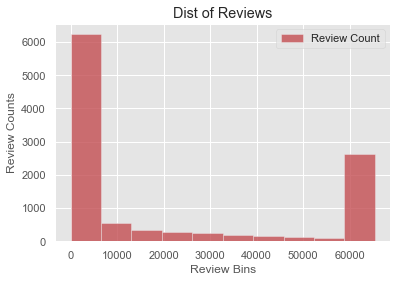

In [60]:
plt.hist(df['Reviews'].values, bins = 10, color = 'r', alpha = 0.8, label = 'Review Count')
plt.xlabel('Review Bins')
plt.ylabel('Review Counts')
plt.title('Dist of Reviews')
plt.legend()
plt.show()

As it is evidently seen, most of the reviews are between 0 and 10,000.

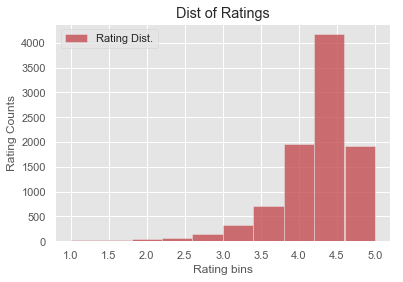

In [61]:
plt.hist(df['Rating'].values, bins = 10, alpha = 0.8, color = 'r', label = 'Rating Dist.')
plt.xlabel('Rating bins')
plt.ylabel('Rating Counts')
plt.title('Dist of Ratings')
plt.legend()
plt.show()

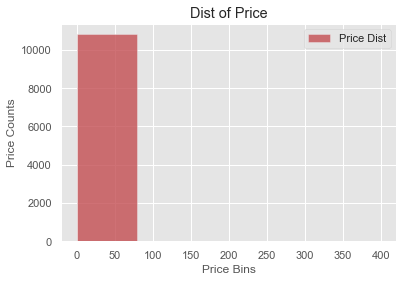

In [62]:
plt.hist(df['Price'].values, bins = 5, color = 'r', alpha = 0.8, label = 'Price Dist')
plt.xlabel('Price Bins')
plt.ylabel('Price Counts')
plt.title('Dist of Price')
plt.legend()
plt.show()

In [63]:
df['Installs'] = df['Installs'].str.replace('+', '').str.replace(',', '').astype(float)

In [64]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

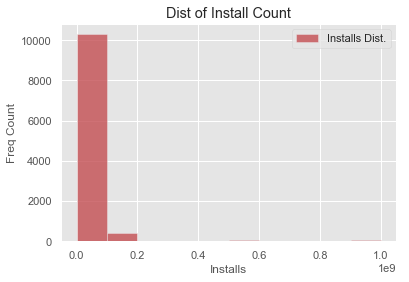

In [65]:
plt.hist(df['Installs'].values, bins = 10, label = 'Installs Dist.', alpha = 0.8, color = 'r')
plt.xlabel('Installs')
plt.ylabel('Freq Count')
plt.title('Dist of Install Count')
plt.legend()
plt.show()

#### Questions posed by IMT

1. Find total records in columns and their datatype

In [66]:
df.shape

(10841, 13)

We have total of 10841 rows and 13 columns. 

2. Calculate statastical parameter for numerical column

In [67]:
df[['Rating', 'Reviews', 'Price']].describe()

Rating   Reviews     Price
count 9367.000 10841.000 10841.000
mean     4.191 20840.736     1.027
std      0.516 27499.390    15.949
min      1.000     0.000     0.000
25%      4.000    38.000     0.000
50%      4.301  2094.000     0.000
75%      4.500 54784.000     0.000
max      5.000 65440.000   400.000

3. Find average rating of app?

In [68]:
df['Rating'].mean()

4.19

4. What is average rating of only those app which comes under Photography category

In [75]:
df.loc[df['Category'] == 'PHOTOGRAPHY', 'Rating'].mean()

4.19

5. How many are free and paid apps

In [77]:
df['Type'].value_counts()

Free    10040
Paid      800
Name: Type, dtype: int64

6. Select top 5 app which has maximum reviews

In [81]:
df.sort_values(by = 'Reviews', ascending = False)[['App', 'Reviews']].head(5)

App   Reviews
5420  Tennis Champion 3D - Online Sports Game 65440.000
3352                            Nova Launcher 65440.000
3334                  osmino Wi-Fi: free WiFi 65440.000
3337                Internet Speed Meter Lite 65440.000
3341                       Keypad Lock Screen 65440.000

7. Select top 5 app which has maximum Installs

In [82]:
df.sort_values(by = 'Installs', ascending = False)[['App', 'Installs']].head(5)

App       Installs
3896                              Subway Surfers 1000000000.000
3943                                    Facebook 1000000000.000
335   Messenger â€“ Text and Video Chat for Free 1000000000.000
3523                                Google Drive 1000000000.000
3565                                Google Drive 1000000000.000

#### Plotting points requested by IMT

1. Category Wise App Split

In [83]:
category_column_split = df['Category'].value_counts()

In [84]:
category_column_split

FAMILY                 1972
GAME                   1144
TOOLS                   843
MEDICAL                 463
BUSINESS                460
PRODUCTIVITY            424
PERSONALIZATION         392
COMMUNICATION           387
SPORTS                  384
LIFESTYLE               383
FINANCE                 366
HEALTH_AND_FITNESS      341
PHOTOGRAPHY             335
SOCIAL                  295
NEWS_AND_MAGAZINES      283
SHOPPING                260
TRAVEL_AND_LOCAL        258
DATING                  234
BOOKS_AND_REFERENCE     231
VIDEO_PLAYERS           175
EDUCATION               156
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     137
FOOD_AND_DRINK          127
HOUSE_AND_HOME           88
LIBRARIES_AND_DEMO       85
AUTO_AND_VEHICLES        85
WEATHER                  82
ART_AND_DESIGN           65
EVENTS                   64
COMICS                   60
PARENTING                60
BEAUTY                   53
Name: Category, dtype: int64

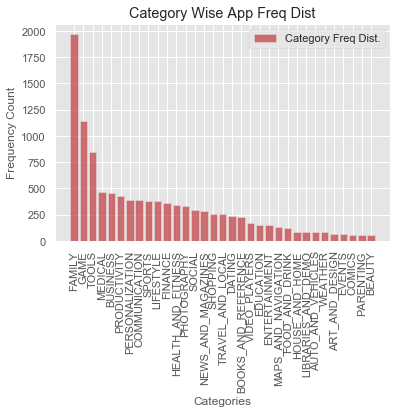

In [85]:
plt.bar(category_column_split.index, category_column_split.values, label = 'Category Freq Dist.', alpha = 0.8, color = 'r')
plt.xlabel('Categories')
plt.ylabel('Frequency Count')

axes = plt.gca()
for label in axes.xaxis.get_ticklabels():    
    label.set_rotation(90)
    
plt.title('Category Wise App Freq Dist')
plt.legend()
plt.show()

2. Categories wise average rating

In [88]:
category_wise_avg_rating = df.groupby('Category').agg(np.mean)

In [89]:
category_wise_avg_rating

Rating   Reviews     Installs  Price
Category                                                 
ART_AND_DESIGN        4.359 10549.923  1912893.846  0.092
AUTO_AND_VEHICLES     4.191  7675.682   625061.306  0.158
BEAUTY                4.277  6565.151   513151.887  0.000
BOOKS_AND_REFERENCE   4.348 15176.632  8318050.113  0.518
BUSINESS              4.121  8902.913  2178075.793  0.403
COMICS                4.156 13093.133   934769.167  0.000
COMMUNICATION         4.160 30688.884 84359886.953  0.215
DATING                3.971 12462.265  1129533.363  0.134
EDUCATION             4.391 33544.577  5586230.769  0.115
ENTERTAINMENT         4.125 42736.859 19256107.383  0.054
EVENTS                4.438  2516.156   249580.641  1.719
FAMILY                4.191 16589.108  5201959.181  1.235
FINANCE               4.133 14616.044  2395215.120  7.926
FOOD_AND_DRINK        4.168 21960.717  2156683.079  0.067
GAME                  4.285 37885.806 30669601.761  0.251
HEALTH_AND_FITNESS    4.277 23913.006  4642441.384  0.197
HOUSE_AND_HOME        4.199 18794.795  1917187.057  0.000
LIBRARIES_AND_DEMO    4.180  6797.518   741128.353  0.012
LIFESTYLE             4.090  9053.342  1403771.642  6.164
MAPS_AND_NAVIGATION   4.051 19231.978  5286729.124  0.197
MEDICAL               4.188  2910.374   115026.862  3.110
NEWS_AND_MAGAZINES    4.133 19211.360 26488755.336  0.014
PARENTING             4.301  5905.733   525351.833  0.160
PERSONALIZATION       4.336 16689.809  5932384.648  0.393
PHOTOGRAPHY           4.191 36429.827 30114172.104  0.401
PRODUCTIVITY          4.211 24151.050 33434177.757  0.592
SHOPPING              4.258 31872.865 12491726.096  0.021
SOCIAL                4.254 30753.681 47694467.464  0.054
SPORTS                4.223 24837.990  4560350.255  0.260
TOOLS                 4.047 15988.295 13585731.809  0.317
TRAVEL_AND_LOCAL      4.109 22369.818 26623593.589  0.194
VIDEO_PLAYERS         4.062 24946.343 35554301.257  0.060
WEATHER               4.242 24241.951  5196347.805  0.395

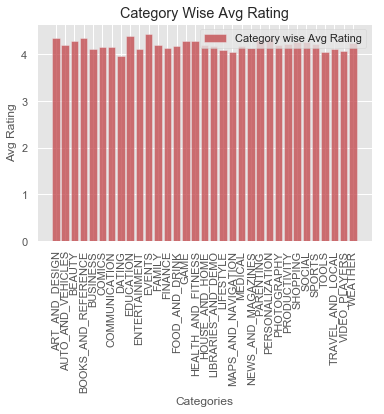

In [92]:
plt.bar(category_wise_avg_rating.index, category_wise_avg_rating['Rating'], color = 'r', alpha = 0.8, label = 'Category wise Avg Rating')
plt.xlabel('Categories')
plt.ylabel('Avg Rating')
plt.title('Category Wise Avg Rating')
plt.legend()
axes = plt.gca()
for label in axes.xaxis.get_ticklabels():
    label.set_rotation(90)
    
plt.show()

3. Category wise total review

In [109]:
category_wise_total_reviews = df.groupby('Category').count()

In [110]:
category_wise_total_reviews

App  Rating  Reviews  Size  Installs  Type  Price  \
Category                                                                  
ART_AND_DESIGN         65      62       65    65        65    65     65   
AUTO_AND_VEHICLES      85      73       85    85        85    85     85   
BEAUTY                 53      42       53    53        53    53     53   
BOOKS_AND_REFERENCE   231     178      231   231       231   231    231   
BUSINESS              460     303      460   460       460   460    460   
COMICS                 60      58       60    60        60    60     60   
COMMUNICATION         387     328      387   387       387   387    387   
DATING                234     195      234   234       234   234    234   
EDUCATION             156     155      156   156       156   156    156   
ENTERTAINMENT         149     149      149   149       149   149    149   
EVENTS                 64      45       64    64        64    64     64   
FAMILY               1972    1747     1972  1972      1972  1971   1972   
FINANCE               366     323      366   366       366   366    366   
FOOD_AND_DRINK        127     109      127   127       127   127    127   
GAME                 1144    1097     1144  1144      1144  1144   1144   
HEALTH_AND_FITNESS    341     297      341   341       341   341    341   
HOUSE_AND_HOME         88      76       88    88        88    88     88   
LIBRARIES_AND_DEMO     85      65       85    85        85    85     85   
LIFESTYLE             383     315      383   383       383   383    383   
MAPS_AND_NAVIGATION   137     124      137   137       137   137    137   
MEDICAL               463     350      463   463       463   463    463   
NEWS_AND_MAGAZINES    283     233      283   283       283   283    283   
PARENTING              60      50       60    60        60    60     60   
PERSONALIZATION       392     314      392   392       392   392    392   
PHOTOGRAPHY           335     317      335   335       335   335    335   
PRODUCTIVITY          424     351      424   424       424   424    424   
SHOPPING              260     238      260   260       260   260    260   
SOCIAL                295     259      295   295       295   295    295   
SPORTS                384     319      384   384       384   384    384   
TOOLS                 843     734      843   843       843   843    843   
TRAVEL_AND_LOCAL      258     226      258   258       258   258    258   
VIDEO_PLAYERS         175     160      175   175       175   175    175   
WEATHER                82      75       82    82        82    82     82   

                     Content Rating  Genres  Last Updated  Current Ver  \
Category                                                                 
ART_AND_DESIGN                   65      65            65           64   
AUTO_AND_VEHICLES                85      85            85           85   
BEAUTY                           53      53            53           53   
BOOKS_AND_REFERENCE             231     231           231          230   
BUSINESS                        460     460           460          460   
COMICS                           60      60            60           60   
COMMUNICATION                   387     387           387          387   
DATING                          234     234           234          234   
EDUCATION                       156     156           156          156   
ENTERTAINMENT                   149     149           149          149   
EVENTS                           64      64            64           64   
FAMILY                         1972    1972          1972         1969   
FINANCE                         366     366           366          366   
FOOD_AND_DRINK                  127     127           127          127   
GAME                           1144    1144          1144         1144   
HEALTH_AND_FITNESS              341     341           341          341   
HOUSE_AND_HOME                   88      88            88       

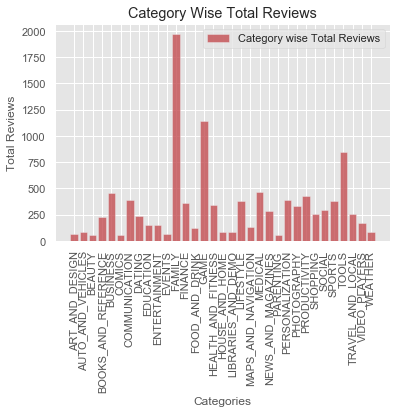

In [105]:
plt.bar(category_wise_total_reviews.index, category_wise_total_reviews['Reviews'], color = 'r', alpha = 0.8, label = 'Category wise Total Reviews')
plt.xlabel('Categories')
plt.ylabel('Total Reviews')
plt.title('Category Wise Total Reviews')
plt.legend()
axes = plt.gca()
for label in axes.xaxis.get_ticklabels():
    label.set_rotation(90)
    
plt.show()

4. Category wise installs

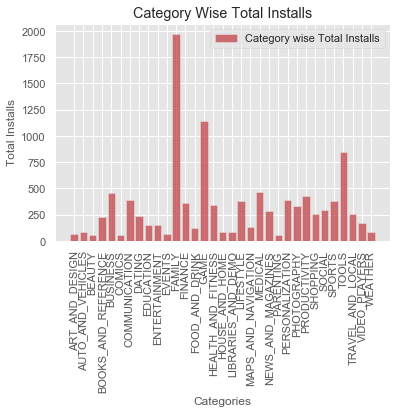

In [106]:
plt.bar(category_wise_total_reviews.index, category_wise_total_reviews['Installs'], color = 'r', alpha = 0.8, label = 'Category wise Total Installs')
plt.xlabel('Categories')
plt.ylabel('Total Installs')
plt.title('Category Wise Total Installs')
plt.legend()
axes = plt.gca()
for label in axes.xaxis.get_ticklabels():
    label.set_rotation(90)
    
plt.show()

5. Category wise free/paid apps

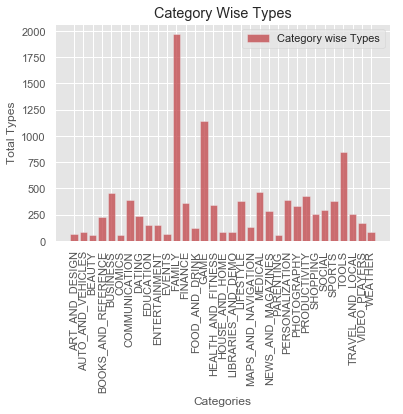

In [107]:
plt.bar(category_wise_total_reviews.index, category_wise_total_reviews['Type'], color = 'r', alpha = 0.8, label = 'Category wise Types')
plt.xlabel('Categories')
plt.ylabel('Total Types')
plt.title('Category Wise Types')
plt.legend()
axes = plt.gca()
for label in axes.xaxis.get_ticklabels():
    label.set_rotation(90)
    
plt.show()